In [1]:
import pandas as pd

In [2]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        10000 non-null  int64  
 1   mileage_per_year  10000 non-null  int64  
 2   model_year        10000 non-null  int64  
 3   price             10000 non-null  float64
 4   sold              10000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 390.8+ KB


In [4]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
dados.describe()

,Unnamed: 0,mileage_per_year,model_year,price
count,10000.00000,10000.000000,10000.00000,10000.000000
mean,4999.50000,14183.391200,2004.14420,64842.373698
std,2886.89568,5008.571422,4.68758,25250.592393
min,0.00000,363.000000,1998.00000,-840.360000
25%,2499.75000,10474.750000,2000.00000,44796.375000
50%,4999.50000,13418.500000,2003.00000,65225.685000
75%,7499.25000,17176.750000,2007.00000,85111.237500
max,9999.00000,39572.000000,2017.00000,118929.720000


In [7]:
dados.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [8]:
dados

,mileage_per_year,model_year,price,sold
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes
...,...,...,...,...
9995,15572,2006,97112.86,no
9996,13246,2002,107424.63,yes
9997,13018,2014,93856.99,no
9998,10464,2011,51250.57,yes


In [9]:
colunas = {'mileage_per_year': 'milhas_ano', 'model_year': 'ano_modelo', 'price': 'preco', 'sold': 'vendido'}

In [13]:
dados.rename(columns=colunas, inplace=True)

In [14]:
dados

,milhas_ano,ano_modelo,preco,vendido
0,21801,2000,30941.02,yes
1,7843,1998,40557.96,yes
2,7109,2006,89627.50,no
3,26823,2015,95276.14,no
4,7935,2014,117384.68,yes
...,...,...,...,...
9995,15572,2006,97112.86,no
9996,13246,2002,107424.63,yes
9997,13018,2014,93856.99,no
9998,10464,2011,51250.57,yes


In [15]:
import seaborn as sns

In [16]:
vendido = {'no': 0, 'yes': 1}

In [17]:
dados.vendido = dados.vendido.map(vendido)

In [18]:
dados

,milhas_ano,ano_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1
...,...,...,...,...
9995,15572,2006,97112.86,0
9996,13246,2002,107424.63,1
9997,13018,2014,93856.99,0
9998,10464,2011,51250.57,1


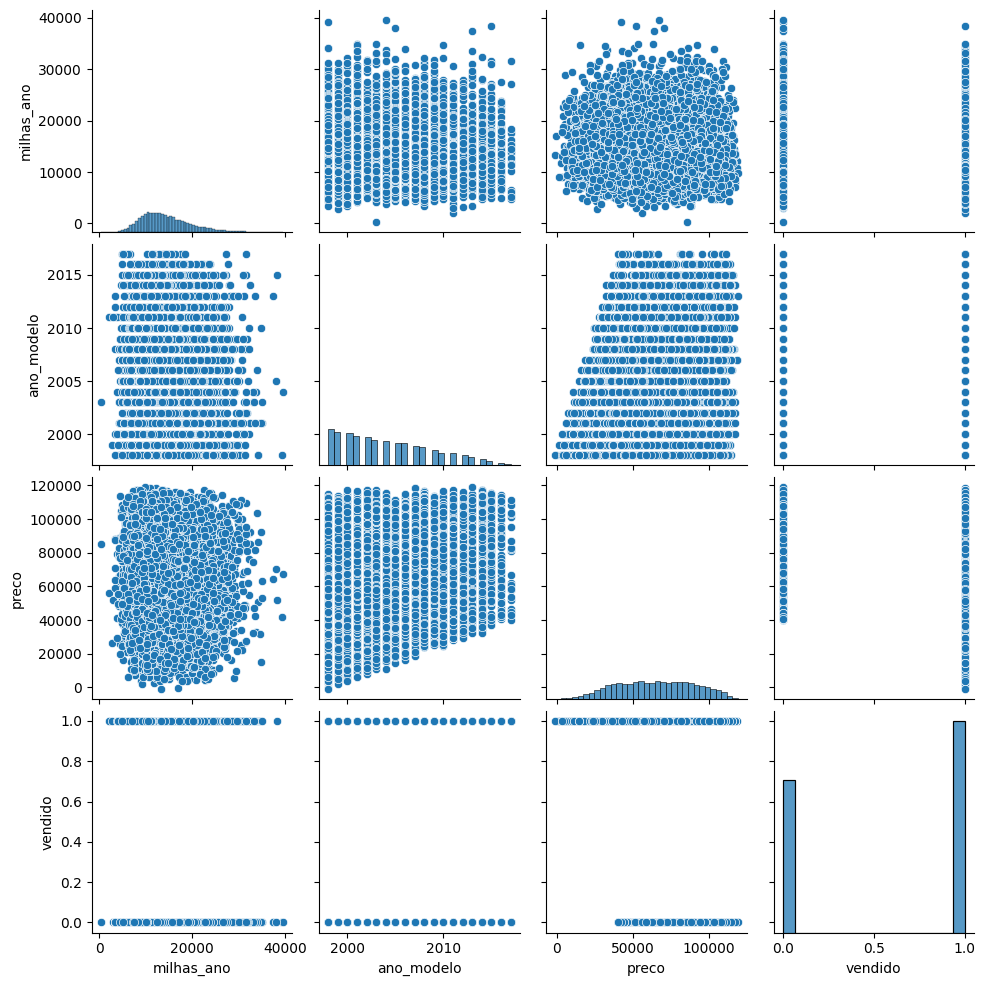

In [19]:
sns.pairplot(data=dados)

In [20]:
from datetime import datetime
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_modelo

In [21]:
dados.head()

,milhas_ano,ano_modelo,preco,vendido,idade_do_modelo
0,21801,2000,30941.02,1,24
1,7843,1998,40557.96,1,26
2,7109,2006,89627.50,0,18
3,26823,2015,95276.14,0,9
4,7935,2014,117384.68,1,10


In [22]:
dados['km_ano'] = dados.milhas_ano * 1.60934

In [23]:
dados.head()

,milhas_ano,ano_modelo,preco,vendido,idade_do_modelo,km_ano
0,21801,2000,30941.02,1,24,35085.22134
1,7843,1998,40557.96,1,26,12622.05362
2,7109,2006,89627.50,0,18,11440.79806
3,26823,2015,95276.14,0,9,43167.32682
4,7935,2014,117384.68,1,10,12770.11290


In [27]:
dados.drop(columns=['milhas_ano', 'ano_modelo'], axis=1, inplace=True)

In [28]:
dados.head()

,preco,vendido,idade_do_modelo,km_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


In [29]:
x = dados[['preco', 'idade_do_modelo', 'km_ano']]
y = dados[['vendido']]

In [30]:
x

,preco,idade_do_modelo,km_ano
0,30941.02,24,35085.22134
1,40557.96,26,12622.05362
2,89627.50,18,11440.79806
3,95276.14,9,43167.32682
4,117384.68,10,12770.11290
...,...,...,...
9995,97112.86,18,25060.64248
9996,107424.63,22,21317.31764
9997,93856.99,10,20950.38812
9998,51250.57,13,16840.13376


In [31]:
y

,vendido
0,1
1,1
2,0
3,0
4,1
...,...
9995,0
9996,1
9997,0
9998,1


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

seed = 5
np.random.seed(seed)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

/projeto/libs/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


65.24

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

seed = 5
np.random.seed(seed)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

/projeto/libs/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


77.48

In [43]:
teste_x

array([[ 0.74789957,  0.45571567, -0.20282198],
       [-0.73801061,  1.30916909, -1.31450999],
       [-0.99485169,  0.66907903, -0.47904751],
       ...,
       [ 1.63777207,  1.30916909, -0.99716997],
       [ 1.61990573,  0.45571567, -0.88799701],
       [-0.07075881,  0.66907903, -0.44451932]])

In [45]:
raw_teste_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 756 to 3699
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   preco            2500 non-null   float64
 1   idade_do_modelo  2500 non-null   int64  
 2   km_ano           2500 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 78.1 KB


In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

seed = 5
np.random.seed(seed)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(treino_x, treino_y)

previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia

79.32000000000001

In [55]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(modelo, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [54]:
!pip install graphviz
!apt-get install graphviz

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: http://binarios.intranet.bb.com.br/artifactory/api/pypi/pypi/simple, http://atf.intranet.bb.com.br/artifactory/api/pypi/bb-python-local/simple

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
